# Matrix Multiplication

This notebook has been translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/matrix_multiply/)

It shows how to perform a matrix multiplication in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")
print("Used GPU: " + cle.get_device().name)

Used GPU: gfx902


## Define two arrays (vectors) and push them to the GPU

In [2]:
array1 = np.asarray([[1, 2, 3, 4, 5]])
array2 = np.asarray([[6, 7, 8, 9, 10]])

vector1 = cle.push_zyx(array1)
vector2 = cle.push_zyx(array2)

## In order to multiplicate matrices, the input matrices must be of size (n * m) and (m * n)
Therefore, we transpose one of our vectors:

In [4]:
vector1_t = cle.transpose_xy(vector1)

print("Vector 1 (transposed): " + str(vector1_t))
print("Vector 2: " + str(vector2))

Vector 1 (transposed): [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Vector 2: [[ 6.  7.  8.  9. 10.]]


In [8]:
matrix = cle.create([vector1_t.shape[0], vector2.shape[1]])
cle.multiply_matrix(vector1_t, vector2, matrix)

print(matrix)

[[ 6.  7.  8.  9. 10.]
 [12. 14. 16. 18. 20.]
 [18. 21. 24. 27. 30.]
 [24. 28. 32. 36. 40.]
 [30. 35. 40. 45. 50.]]


c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


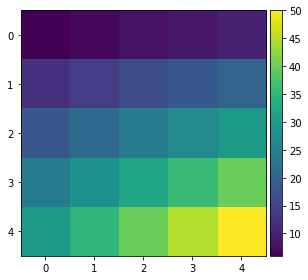

In [9]:
imshow(cle.pull_zyx(matrix))

## Element by element multiplication of two matrices

[[ 0.22616261  5.6746645   3.4958653   4.5057087   9.762815  ]
 [ 6.9489827   0.78660697  7.6474037  17.792257   19.455872  ]
 [10.0111265   2.0576067   5.845306   24.150177   25.02832   ]
 [19.231754   21.08003    16.598803   26.666893   22.625704  ]
 [ 1.608865   14.509063   29.679478   34.252613   16.493982  ]]


c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


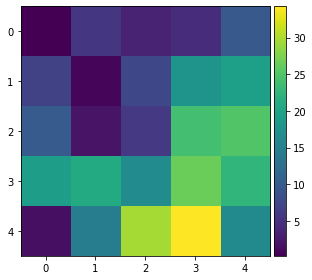

In [14]:
# generate another matrix of the same size with random values
another_matrix = cle.push_zyx(np.random.random(matrix.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix, another_matrix)

print(matrix_element_wise_multiplied)

imshow(cle.pull_zyx(matrix_element_wise_multiplied))

## Element by element multiplication of a matrix with a scalar

In [15]:
elements_times_2 = cle.multiply_image_and_scalar(matrix, scalar=2)
print(elements_times_2)

[[ 12.  14.  16.  18.  20.]
 [ 24.  28.  32.  36.  40.]
 [ 36.  42.  48.  54.  60.]
 [ 48.  56.  64.  72.  80.]
 [ 60.  70.  80.  90. 100.]]


c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:253: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)
